# Weather and Electricity Data Analysis Notebook


### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns



In [2]:
def read_data(path, file_list):
    data = []
    for file in file_list:
        i = pd.read_csv(path + file)
        i['Date'] = pd.to_datetime(i['Date'], format='%Y-%m-%d')     # Convert the Date column to datetime format
        i = i[['Date', 'Year', 'Month', 'Selected business demand (GWh)', 'Est. Total consumption (GWh)', 
               'Total Rainfall Mm', 'Mean Air Temperature in Celsius', 'Mean Vapour Pressure Hpa', 'Mean Wind Speed M/Sec',
               'Days Of Wind Gust >= 24 Knots in Day', 'Standard Deviation Of Daily Mean Temperature in Celsius',  
               'Export prices', 'Export volumes', 'Export values', 'Import prices', 'Import volumes', 'Import values', 'Population']]
        data.append(i)
    return data

### Read data files using helper functions above

In [3]:
Datafilelist = ['Electricity-ResBusClimateUNI.csv', 'Electricity-ResBusClimateCNI.csv', 'Electricity-ResBusClimateLNI.csv','Electricity-ResBusClimateUSI.csv', 'Electricity-ResBusClimateLSI.csv']
FilePath = './ProcessedData_Original/'

ElectricityResBusClimateData = read_data(FilePath, Datafilelist)


In [4]:
uni_climate_electricity = ElectricityResBusClimateData[0]
cni_climate_electricity = ElectricityResBusClimateData[1]
lni_climate_electricity = ElectricityResBusClimateData[2]
usi_climate_electricity = ElectricityResBusClimateData[3]
lsi_climate_electricity = ElectricityResBusClimateData[4]

In [5]:
uni_climate_electricity.columns

Index(['Date', 'Year', 'Month', 'Selected business demand (GWh)',
       'Est. Total consumption (GWh)', 'Total Rainfall Mm',
       'Mean Air Temperature in Celsius', 'Mean Vapour Pressure Hpa',
       'Mean Wind Speed M/Sec', 'Days Of Wind Gust >= 24 Knots in Day',
       'Standard Deviation Of Daily Mean Temperature in Celsius',
       'Export prices', 'Export volumes', 'Export values', 'Import prices',
       'Import volumes', 'Import values', 'Population'],
      dtype='object')

### Visualise Data

In [6]:
uni_byyear = uni_climate_electricity.groupby('Year').mean(numeric_only=True).reset_index()
cni_byyear = cni_climate_electricity.groupby('Year').mean(numeric_only=True).reset_index()
lni_byyear = lni_climate_electricity.groupby('Year').mean(numeric_only=True).reset_index()
usi_byyear = usi_climate_electricity.groupby('Year').mean(numeric_only=True).reset_index()
lsi_byyear = lsi_climate_electricity.groupby('Year').mean(numeric_only=True).reset_index()

## Climate

Text(0.5, 1.0, 'Lower South Island')

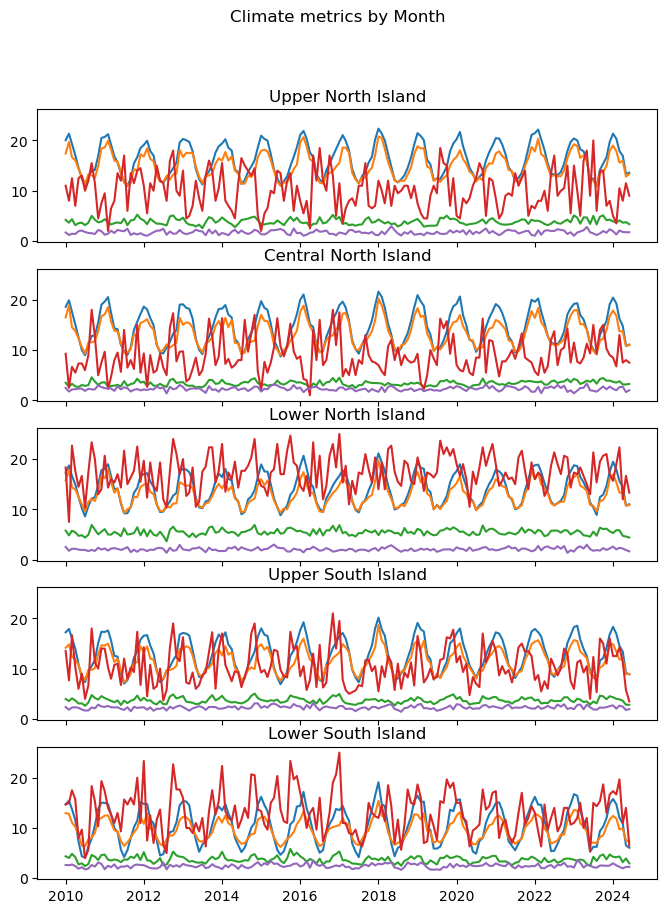

In [7]:
numeric_columns = ['Mean Air Temperature in Celsius', 
                   'Mean Vapour Pressure Hpa', 
                   'Mean Wind Speed M/Sec', 
                   'Days Of Wind Gust >= 24 Knots in Day', 
                   'Standard Deviation Of Daily Mean Temperature in Celsius']

months = uni_climate_electricity['Date'].values.reshape(-1, 1)

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Climate metrics by Month')

axs[0].plot(months, list(uni_climate_electricity[numeric_columns].values))
axs[0].set_title('Upper North Island')

axs[1].plot(months, cni_climate_electricity[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(months, lni_climate_electricity[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(months, usi_climate_electricity[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(months, lsi_climate_electricity[numeric_columns].values)
axs[4].set_title('Lower South Island')

Text(0.5, 1.0, 'Lower South Island')

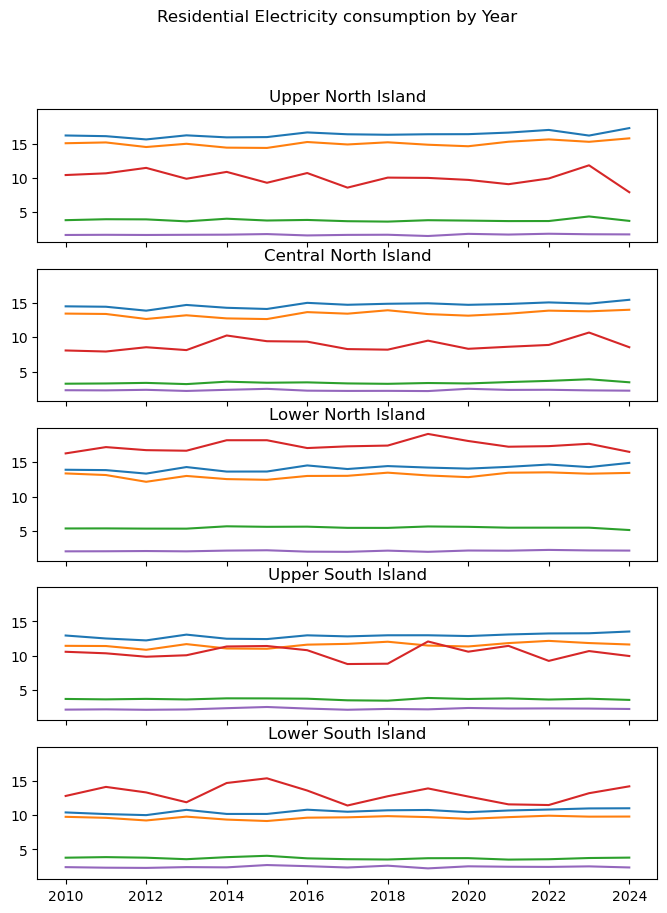

In [8]:

numeric_columns = ['Mean Air Temperature in Celsius', 
                   'Mean Vapour Pressure Hpa', 
                   'Mean Wind Speed M/Sec', 
                   'Days Of Wind Gust >= 24 Knots in Day', 
                   'Standard Deviation Of Daily Mean Temperature in Celsius']

years = uni_byyear['Year'].values.reshape(-1, 1)

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Residential Electricity consumption by Year')

axs[0].plot(years, uni_byyear[numeric_columns].values)
axs[0].set_title('Upper North Island')


axs[1].plot(years, cni_byyear[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(years, lni_byyear[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(years, usi_byyear[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(years, lsi_byyear[numeric_columns].values)
axs[4].set_title('Lower South Island')




Text(0.5, 1.0, 'Lower South Island')

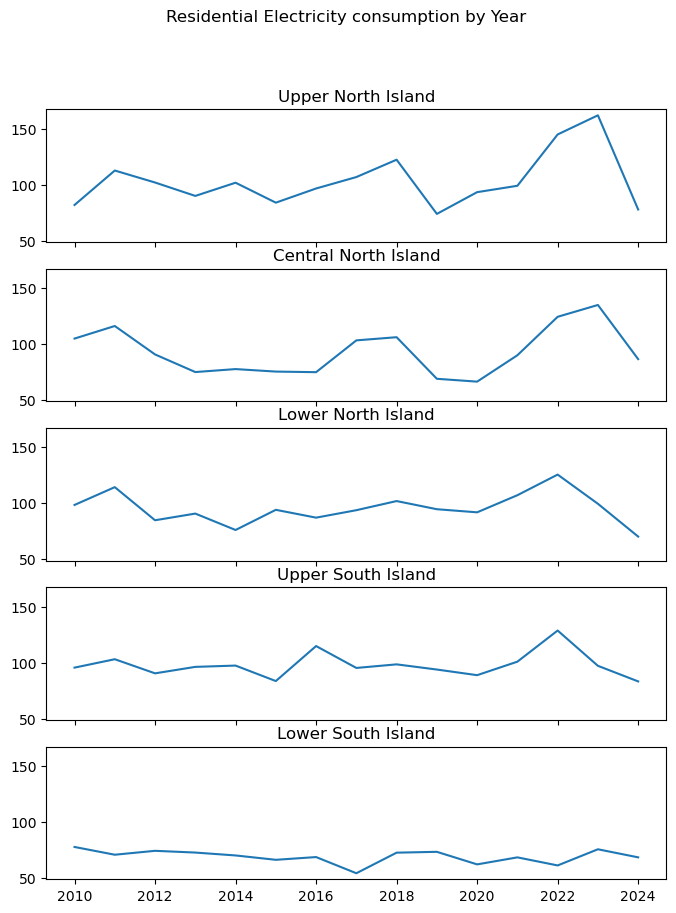

In [9]:
numeric_columns = ['Total Rainfall Mm']

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Residential Electricity consumption by Year')

axs[0].plot(years, uni_byyear[numeric_columns].values)
axs[0].set_title('Upper North Island')


axs[1].plot(years, cni_byyear[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(years, lni_byyear[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(years, usi_byyear[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(years, lsi_byyear[numeric_columns].values)
axs[4].set_title('Lower South Island')


# Export/ import data and population data

Text(0.5, 1.0, 'Lower South Island')

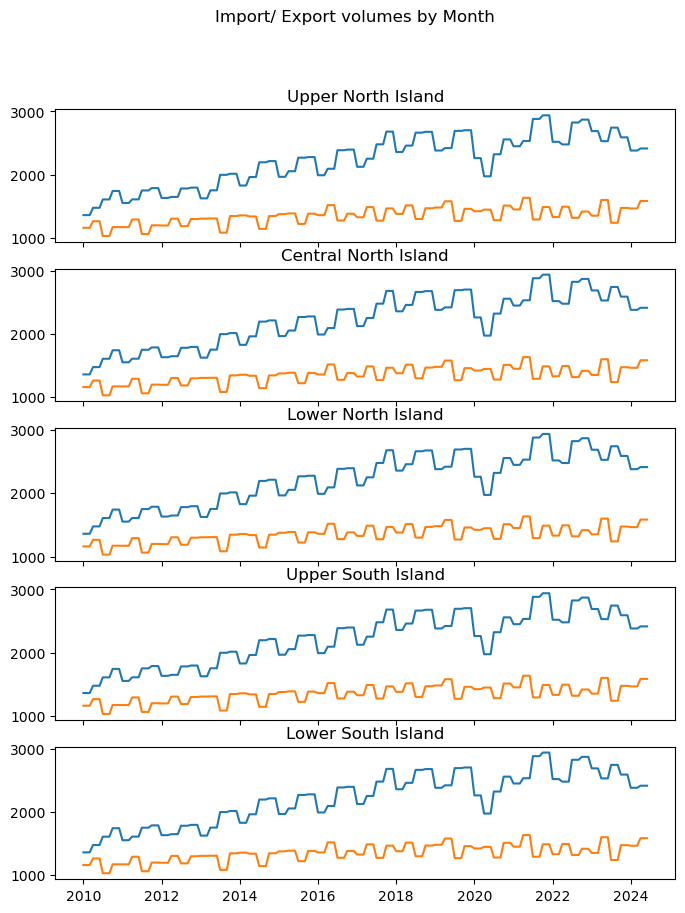

In [10]:
numeric_columns = ['Import volumes', 'Export volumes']

months = uni_climate_electricity['Date'].values.reshape(-1, 1)

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Import/ Export volumes by Month')

axs[0].plot(months, list(uni_climate_electricity[numeric_columns].values))
axs[0].set_title('Upper North Island')

axs[1].plot(months, cni_climate_electricity[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(months, lni_climate_electricity[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(months, usi_climate_electricity[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(months, lsi_climate_electricity[numeric_columns].values)
axs[4].set_title('Lower South Island')

Text(0.5, 1.0, 'Lower South Island')

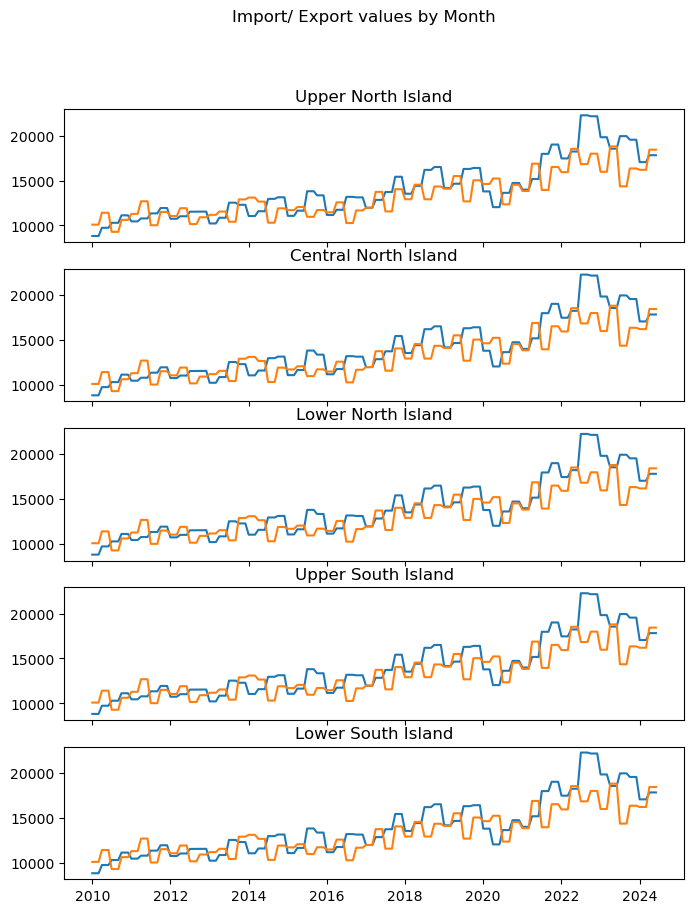

In [11]:
numeric_columns = ['Import values', 'Export values']

months = uni_climate_electricity['Date'].values.reshape(-1, 1)

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Import/ Export values by Month')

axs[0].plot(months, list(uni_climate_electricity[numeric_columns].values))
axs[0].set_title('Upper North Island')

axs[1].plot(months, cni_climate_electricity[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(months, lni_climate_electricity[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(months, usi_climate_electricity[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(months, lsi_climate_electricity[numeric_columns].values)
axs[4].set_title('Lower South Island')

Text(0.5, 1.0, 'Lower South Island')

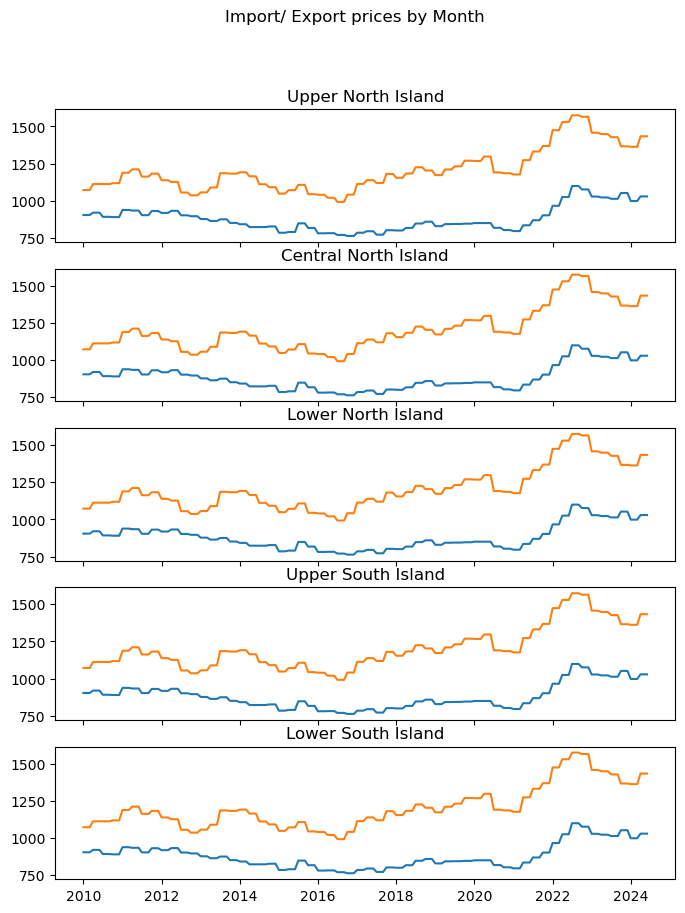

In [12]:
numeric_columns = ['Import prices', 'Export prices']

months = uni_climate_electricity['Date'].values.reshape(-1, 1)

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Import/ Export prices by Month')

axs[0].plot(months, list(uni_climate_electricity[numeric_columns].values))
axs[0].set_title('Upper North Island')

axs[1].plot(months, cni_climate_electricity[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(months, lni_climate_electricity[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(months, usi_climate_electricity[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(months, lsi_climate_electricity[numeric_columns].values)
axs[4].set_title('Lower South Island')

Text(0.5, 1.0, 'Lower South Island')

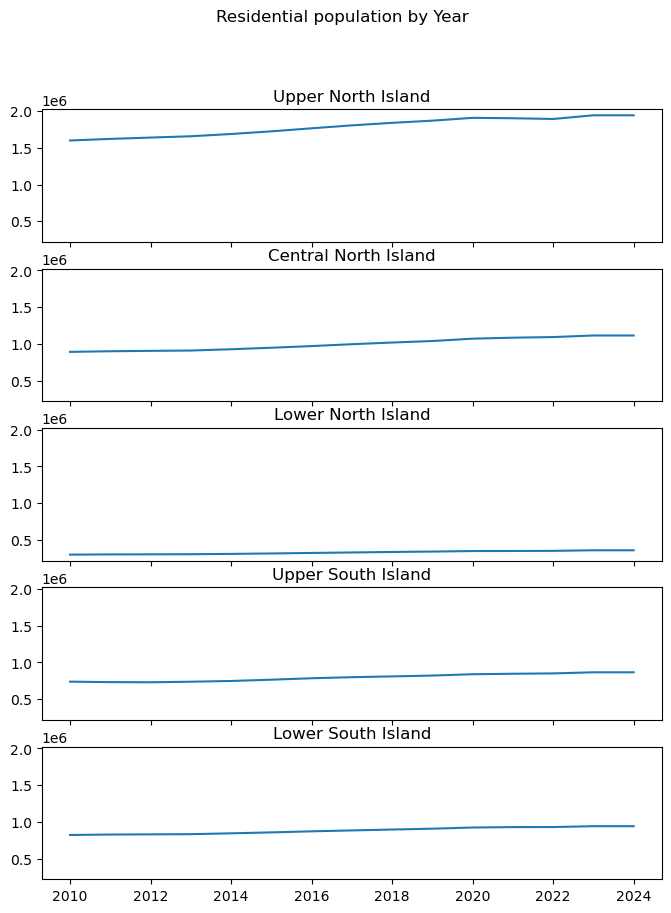

In [13]:
numeric_columns = ['Population']

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Residential population by Year')

axs[0].plot(years, uni_byyear[numeric_columns].values)
axs[0].set_title('Upper North Island')


axs[1].plot(years, cni_byyear[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(years, lni_byyear[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(years, usi_byyear[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(years, lsi_byyear[numeric_columns].values)
axs[4].set_title('Lower South Island')


## Electricity Data

#### Electricity Business Data

Text(0, 0.5, 'Selected business demand (GWh)')

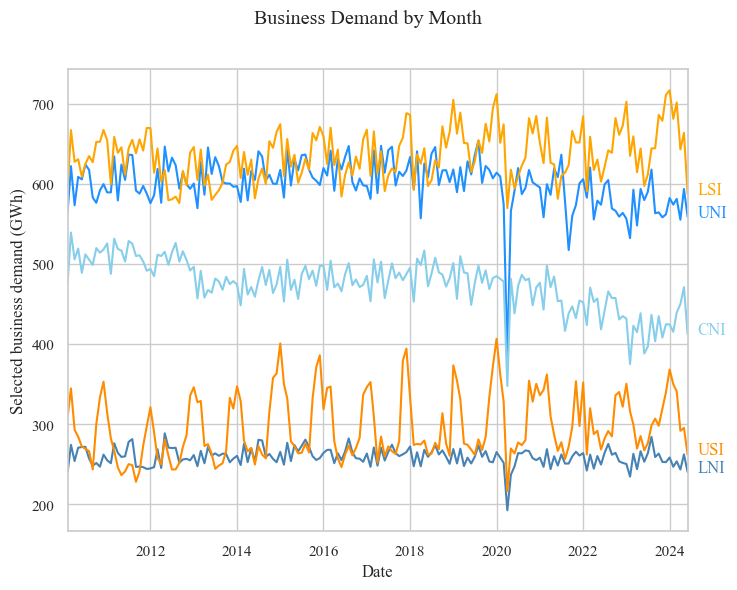

In [33]:
plt.rcParams["font.serif"] = ["Times New Roman"]
numeric_columns = ['Selected business demand (GWh)']

months = uni_climate_electricity['Date'].values.reshape(-1, 1)

fig, axs = plt.subplots(figsize=(8, 6))
fig.suptitle('Business Demand by Month')

month_shift = months[-1] + pd.Timedelta(weeks=12)

label = 'UNI'
color = 'dodgerblue'
axs.plot(months, uni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], uni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, uni_climate_electricity[numeric_columns].values[-1]),
  color  = color,
)


label = 'CNI'
color = 'skyblue'
axs.plot(months, cni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], cni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, cni_climate_electricity[numeric_columns].values[-1]),
  color  = color,
)


label = 'LNI'
color = 'steelblue'
axs.plot(months, lni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], lni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, lni_climate_electricity[numeric_columns].values[-1]),
  color  = color,
)

label = 'USI'
color = 'darkorange'
axs.plot(months, usi_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], usi_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, usi_climate_electricity[numeric_columns].values[-1]),
  color  = color,
)


label = 'LSI'
color = 'orange'
axs.plot(months, lsi_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], lsi_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, lsi_climate_electricity[numeric_columns].values[-1]),
  color  = color,
)

#axs.axvline(x=months[-51], color='black', linestyle='--')

axs.set_xlim(months[1], months[-1])

axs.set_xlabel('Date')
axs.set_ylabel('Selected business demand (GWh)')




Text(0, 0.5, 'Selected business demand (GWh)')

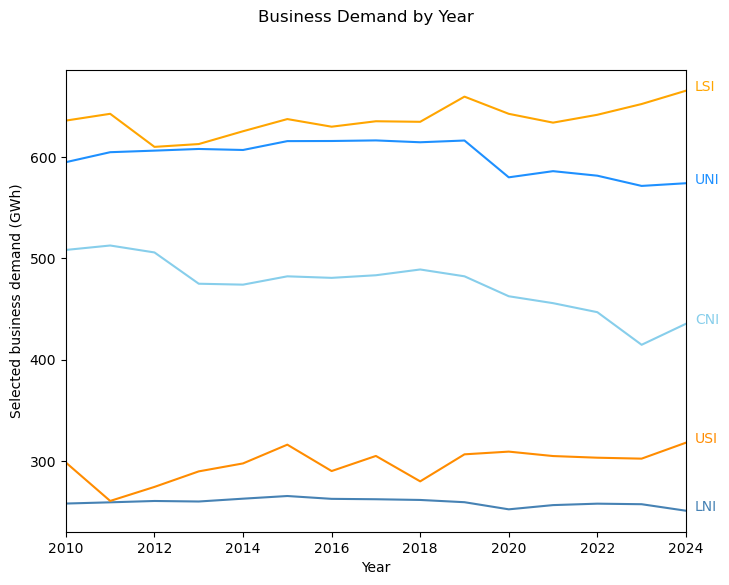

In [15]:
numeric_columns = ['Selected business demand (GWh)']
year_offset = years[-1] + 0.2

fig, axs = plt.subplots(figsize=(8, 6))
fig.suptitle('Business Demand by Year')


label = 'UNI'
color = 'dodgerblue'
axs.plot(years, uni_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], uni_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, uni_byyear[numeric_columns].values[-1]),
  color  = color,
)


label = 'CNI'
color = 'skyblue'
axs.plot(years, cni_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], cni_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, cni_byyear[numeric_columns].values[-1]),
  color  = color,
)


label = 'LNI'
color = 'steelblue'
axs.plot(years, lni_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1,], lni_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, lni_byyear[numeric_columns].values[-1]),
  color  = color,
)

label = 'USI'
color = 'darkorange'
axs.plot(years, usi_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], usi_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, usi_byyear[numeric_columns].values[-1]),
  color  = color,
)


label = 'LSI'
color = 'orange'
axs.plot(years, lsi_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], lsi_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, lsi_byyear[numeric_columns].values[-1]),
  color  = color,
)

axs.set_xlim(2010, years[-1])

axs.set_xlabel('Year')
axs.set_ylabel('Selected business demand (GWh)')




#### Electricity Residential Data

Text(0, 0.5, 'Est. Total consumption (GWh)')

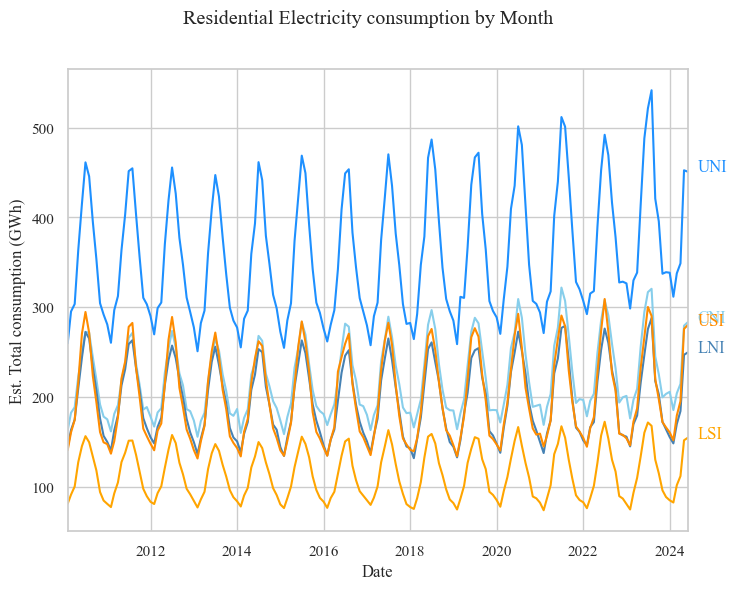

In [32]:
plt.rcParams["font.serif"] = ["Times New Roman"]
numeric_columns = ['Est. Total consumption (GWh)']
months = uni_climate_electricity['Date'].values.reshape(-1, 1)

fig, axs = plt.subplots(figsize=(8, 6))
fig.suptitle('Residential Electricity consumption by Month')

month_shift = months[-1] + pd.Timedelta(weeks=12)

label = 'UNI'
color = 'dodgerblue'
axs.plot(months, uni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], uni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, uni_climate_electricity[numeric_columns].values[-1]),
  color  = color,
)


label = 'CNI'
color = 'skyblue'
axs.plot(months, cni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], cni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, cni_climate_electricity[numeric_columns].values[-1]),
  color  = color,
)


label = 'LNI'
color = 'steelblue'
axs.plot(months, lni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], lni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, lni_climate_electricity[numeric_columns].values[-1]),
  color  = color,
)

label = 'USI'
color = 'darkorange'
axs.plot(months, usi_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], usi_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, usi_climate_electricity[numeric_columns].values[-1]),
  color  = color,
)


label = 'LSI'
color = 'orange'
axs.plot(months, lsi_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], lsi_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, lsi_climate_electricity[numeric_columns].values[-1]),
  color  = color,
)

axs.set_xlim(months[1], months[-1])

axs.set_xlabel('Date')
axs.set_ylabel('Est. Total consumption (GWh)')




Text(0, 0.5, 'Est. Total consumption (GWh)')

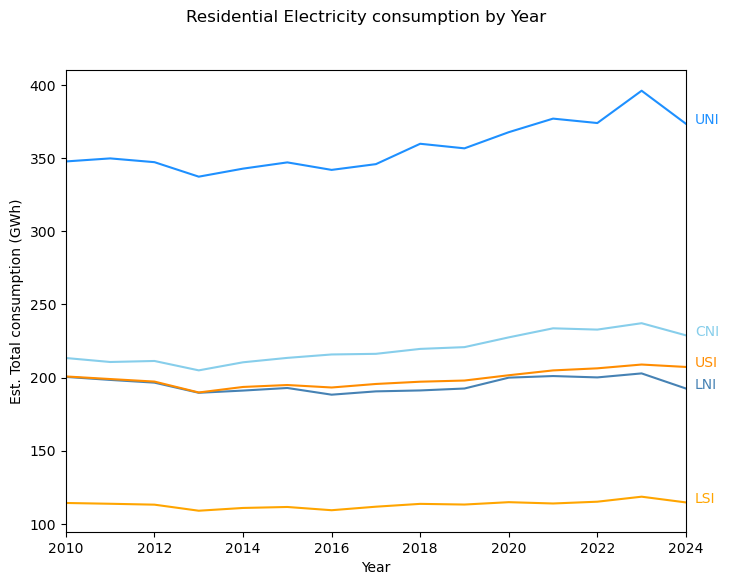

In [17]:
numeric_columns = ['Est. Total consumption (GWh)']

fig, axs = plt.subplots(figsize=(8, 6))
fig.suptitle('Residential Electricity consumption by Year')

year_offset = years[-1] + 0.2

label = 'UNI'
color = 'dodgerblue'
axs.plot(years, uni_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], uni_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, uni_byyear[numeric_columns].values[-1]),
  color  = color,
)


label = 'CNI'
color = 'skyblue'
axs.plot(years, cni_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], cni_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, cni_byyear[numeric_columns].values[-1]),
  color  = color,
)


label = 'LNI'
color = 'steelblue'
axs.plot(years, lni_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1,], lni_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, lni_byyear[numeric_columns].values[-1]),
  color  = color,
)

label = 'USI'
color = 'darkorange'
axs.plot(years, usi_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], usi_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, usi_byyear[numeric_columns].values[-1]),
  color  = color,
)


label = 'LSI'
color = 'orange'
axs.plot(years, lsi_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], lsi_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, lsi_byyear[numeric_columns].values[-1]),
  color  = color,
)


axs.set_xlim(2010, years[-1])

axs.set_xlabel('Year')
axs.set_ylabel('Est. Total consumption (GWh)')




### Correlation visualisation

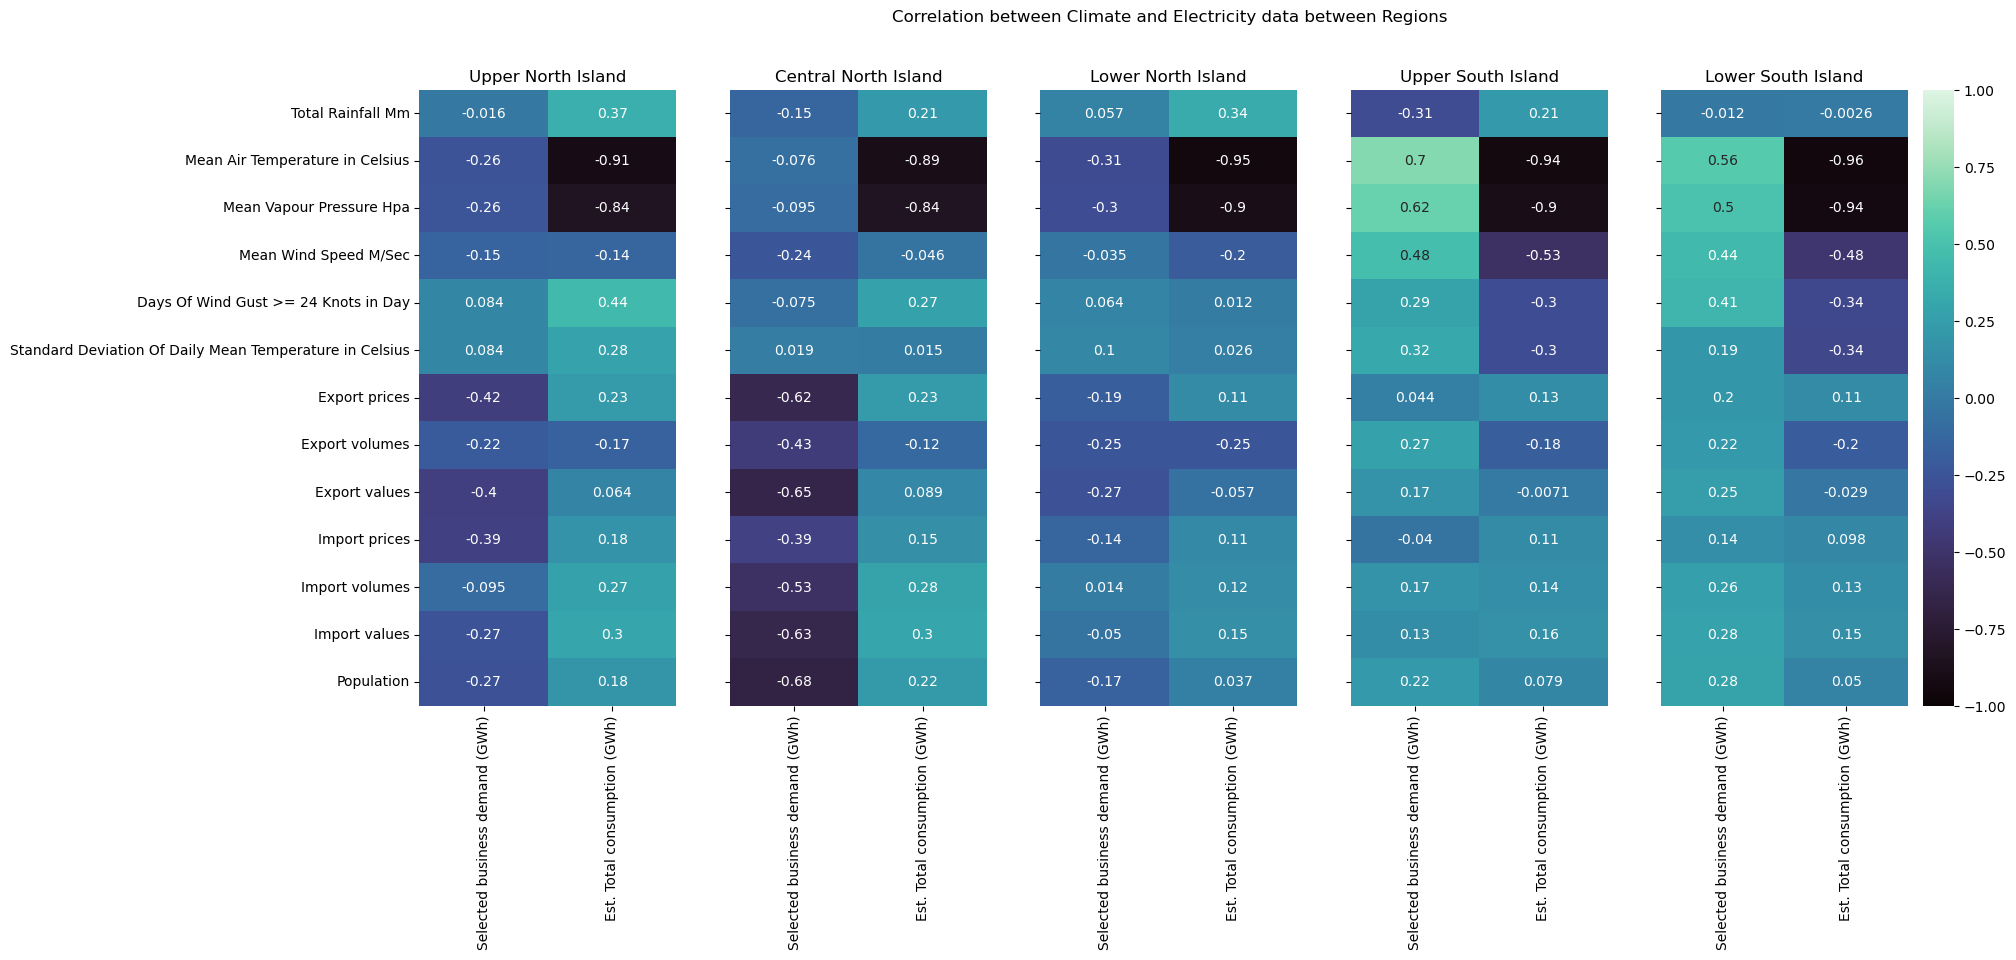

In [18]:

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(20, 8), sharey=True, sharex=True, gridspec_kw=dict(width_ratios=[1,1,1,1,1.2]))

fig.suptitle('Correlation between Climate and Electricity data between Regions')

sns.heatmap(uni_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax1, cbar=False, cmap='mako')
ax1.set_title('Upper North Island')

sns.heatmap(cni_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax2, cbar=False, cmap='mako')
ax2.set_title('Central North Island')

sns.heatmap(lni_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax3, cbar=False, cmap='mako')
ax3.set_title('Lower North Island')

sns.heatmap(usi_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax4, cbar=False, cmap='mako')
ax4.set_title('Upper South Island')

sns.heatmap(lsi_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax5, cmap='mako')
ax5.set_title('Lower South Island')

plt.show()





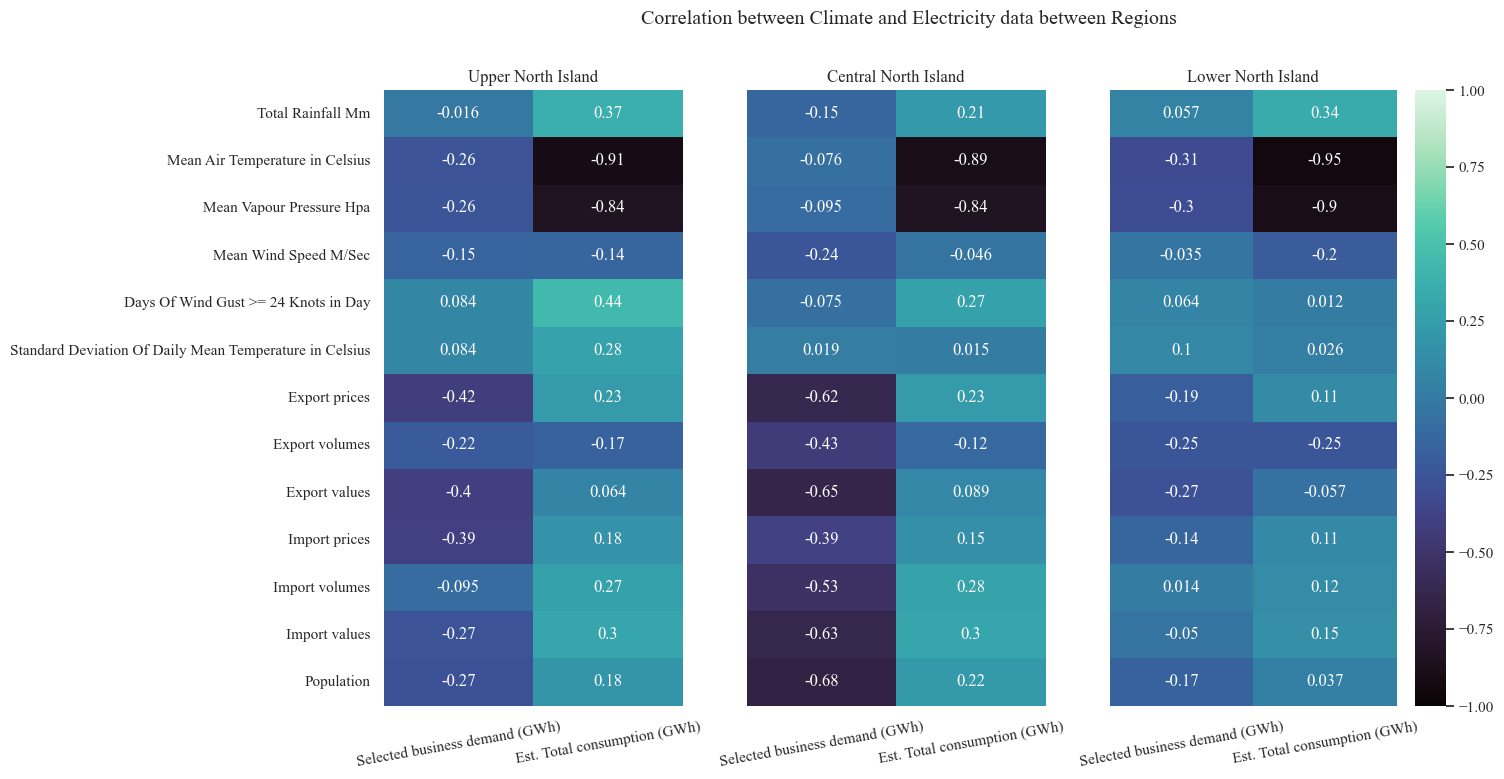

In [30]:
sns.set_theme(font = 'Times New Roman', style="whitegrid")

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 8), sharey=True, sharex=True, gridspec_kw=dict(width_ratios=[1,1,1.2]))

fig.suptitle('Correlation between Climate and Electricity data between Regions')

sns.heatmap(uni_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax1, cbar=False, cmap='mako')
ax1.set_title('Upper North Island')
ax1.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], rotation=10)

sns.heatmap(cni_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax2, cbar=False, cmap='mako')
ax2.set_title('Central North Island')
ax2.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], rotation=10)

sns.heatmap(lni_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax3, cmap='mako')
ax3.set_title('Lower North Island')
ax3.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], rotation=10)



plt.show()





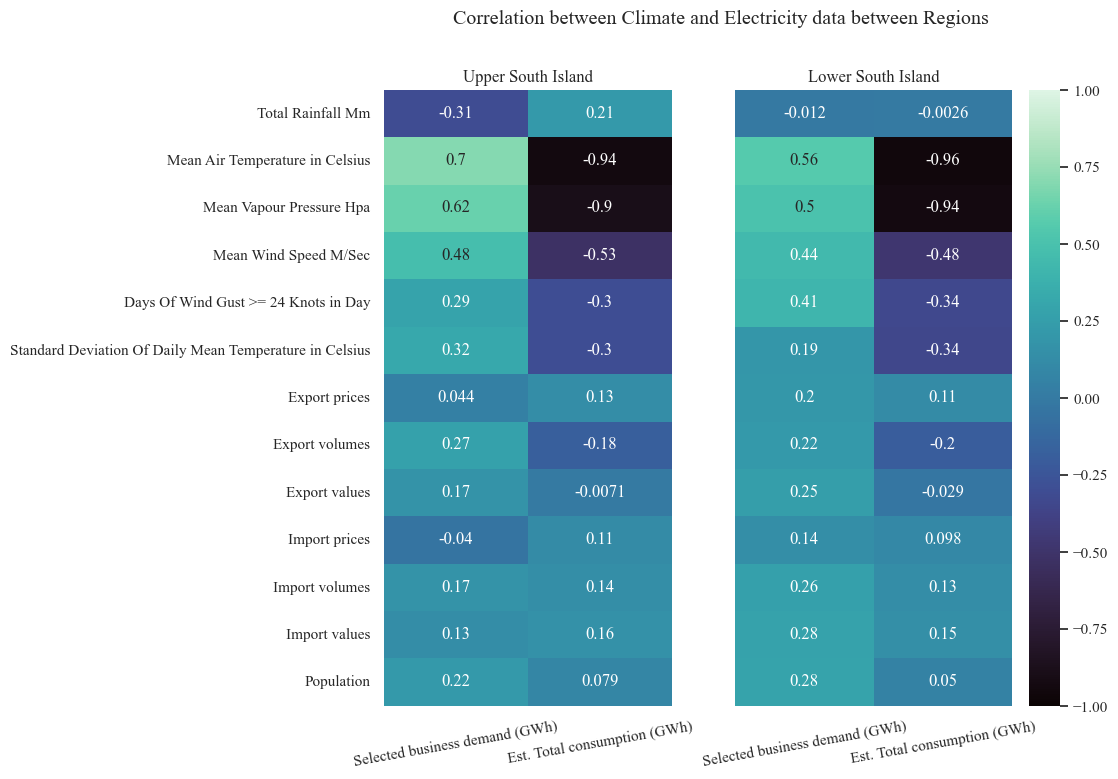

In [31]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 8), sharey=True, sharex=True, gridspec_kw=dict(width_ratios=[1,1.2]))

fig.suptitle('Correlation between Climate and Electricity data between Regions')

sns.heatmap(usi_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax1, cbar=False, cmap='mako')
ax1.set_title('Upper South Island')
ax1.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], rotation=10)

sns.heatmap(lsi_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax2, cmap='mako')
ax2.set_title('Lower South Island')
ax2.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], rotation=10)



plt.show()





sns.heatmap(uni_climate_electricity.corr().iloc[3:,3:], annot=True, cmap='mako', annot_kws={"size": 6})
sns.heatmap(cni_climate_electricity.corr().iloc[3:,3:], annot=True, cmap='mako', annot_kws={"size": 6})
sns.heatmap(lni_climate_electricity.corr().iloc[3:,3:], annot=True, cmap='mako', annot_kws={"size": 6})
sns.heatmap(usi_climate_electricity.corr().iloc[3:,3:], annot=True, cmap='mako', annot_kws={"size": 6})
sns.heatmap(lsi_climate_electricity.corr().iloc[3:,3:], annot=True, cmap='mako', annot_kws={"size": 6})


### Plots for Richard

##### Residential

NameError: name 'os' is not defined

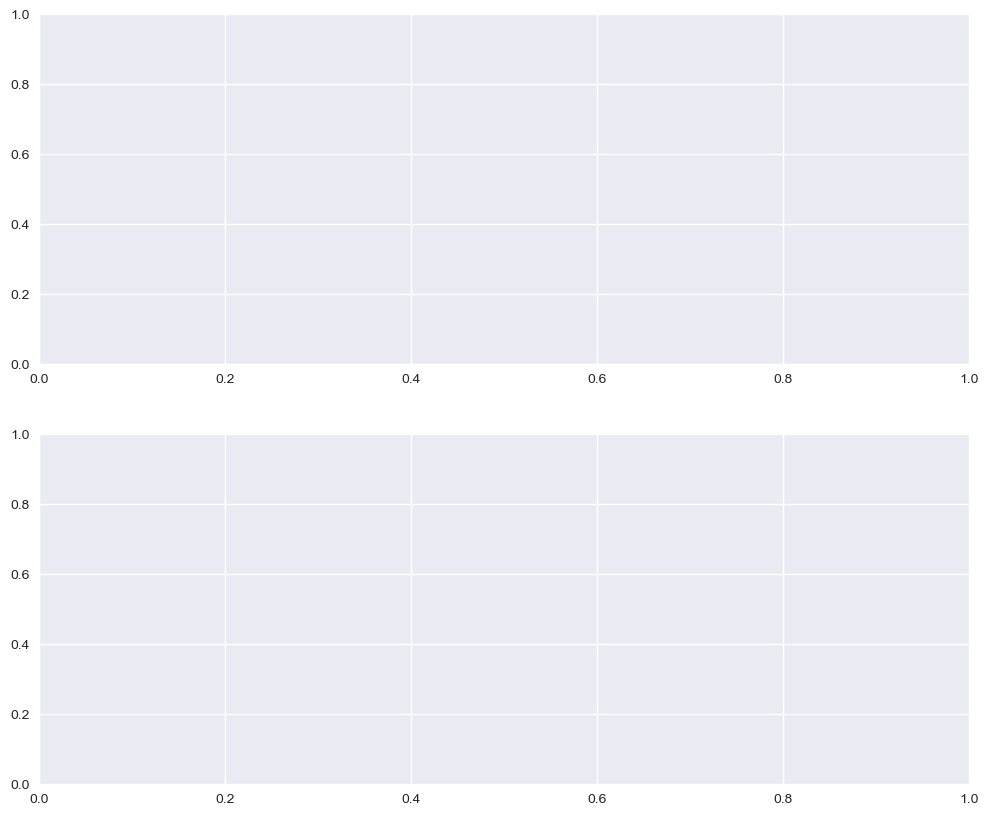

In [34]:
zones = ['uni', 'cni', 'lni', 'usi', 'lsi']

plt.style.use('seaborn-v0_8')
color_palette = sns.color_palette("colorblind", 10)

for zone in zones:
    directory = 'res/' + zone
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    for i, csv_file in enumerate(csv_files):
        file_path = os.path.join(directory, csv_file)
        if csv_file.lower().find('tft') != -1:
            model_params = csv_file.split('.')[0]
        else:
            model_params = csv_file.split(',')[0]
        df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
        color = color_palette[i % len(color_palette)]
        ax1.plot(df.index, df['predictions'], label=model_params, color=color)
        ax2.plot(df.index, df['difference'], label=model_params, color=color)
        if csv_file == csv_files[-1]:
            ax1.plot(df.index, df['actual'], label='actual', color='black', linewidth=1)
    
    ax1.set_title(zone.upper() + ' Residential Predictions')
    ax1.set_ylabel('Consumption (GWh)')
    ax1.legend()
    
    ax2.set_title(zone.upper() + ' Residential Consumption Difference (Predicted - Actual)')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Difference (GWh)')
    ax2.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    ax2.legend()
    
    fig.autofmt_xdate()
    
    # Use tight layout to prevent the labels from being cut off
    plt.tight_layout()
    
    # Show the plot
    plt.show()